In [2]:
import ImageRepresentation
from rsift_extraction import _GetSingleImageFeature
import numpy as np
import cv2 as cv
import os
from delf import feature_io
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import image as img
query_dir = "/home/canhld/workplace/Daejeon_street_view/datasets/sim_driving_delf/"
query_images_dir = "/home/canhld/workplace/Daejeon_street_view/datasets/sim_driving/"
database_dir = "/home/canhld/workplace/Daejeon_street_view/datasets/daejeon_sv_v1_vlad256_delf/"
image_dir = "/home/canhld/workplace/Daejeon_street_view/datasets/daejeon_sv_v1/"
saved_model = "/home/canhld/workplace/Daejeon_street_view/datasets/codebook/delf_256_model.pkl"

/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [3]:
ir = ImageRepresentation.ImageRepresentation(name = 'delf_vlad', saved_model = saved_model )
print(ir.codebook.cluster_centers_.shape)

(256, 40)


In [4]:
query_vectors = []
queries = []
query_images = []
queries = [int(f.split('.')[0]) for f in os.listdir(query_images_dir) if f.split('.')[1] == 'jpg']
queries.sort()
queries = [str(query) for query in queries]

for query in queries:
        im = cv.imread(os.path.join(query_images_dir, query + '.jpg'), flags=cv.IMREAD_UNCHANGED)
        query_images.append(cv.cvtColor(im, cv.COLOR_RGB2BGR))
        _,_,features,_,_ = feature_io.ReadFromFile(os.path.join(query_dir, query + '.delf'))
        vector = ir.VLADEncode(features)
        query_vectors.append(vector)

W1003 15:40:23.117453 140440527394560 deprecation.py:323] From /home/canhld/workplace/models/research/delf/delf/python/feature_io.py:171: FastGFile.__init__ (from tensorflow.python.platform.gfile) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.gfile.GFile.


(10240,)
(10240,)
(10240,)
(10240,)
(10240,)
(10240,)
(10240,)
(10240,)
(10240,)
(10240,)
(10240,)
(10240,)
(10240,)
(10240,)
(10240,)
(10240,)
(10240,)
(10240,)
(10240,)
(10240,)
(10240,)
(10240,)
(10240,)
(10240,)
(10240,)
(10240,)
(10240,)
(10240,)
(10240,)
(10240,)
(10240,)
(10240,)
(10240,)
(10240,)
(10240,)
(10240,)
(10240,)
(10240,)
(10240,)
(10240,)
(10240,)
(10240,)
(10240,)
(10240,)
(10240,)
(10240,)
(10240,)
(10240,)
(10240,)
(10240,)
(10240,)
(10240,)
(10240,)
(10240,)
(10240,)
(10240,)
(10240,)
(10240,)
(10240,)
(10240,)
(10240,)
(10240,)
(10240,)
(10240,)
(10240,)
(10240,)
(10240,)
(10240,)
(10240,)
(10240,)
(10240,)
(10240,)
(10240,)
(10240,)
(10240,)
(10240,)
(10240,)
(10240,)
(10240,)
(10240,)
(10240,)
(10240,)
(10240,)
(10240,)
(10240,)
(10240,)
(10240,)
(10240,)
(10240,)
(10240,)
(10240,)
(10240,)
(10240,)
(10240,)
(10240,)
(10240,)
(10240,)
(10240,)
(10240,)
(10240,)
(10240,)
(10240,)
(10240,)
(10240,)
(10240,)
(10240,)
(10240,)
(10240,)
(10240,)
(10240,)
(10240,)
(

In [5]:
database = []
indexes = []
for f in os.listdir(database_dir):
    filename = f.split('.')
    vector = np.load(os.path.join(database_dir, f), allow_pickle=True)
    indexes.append(filename[0])
    database.append(vector)

Query 0


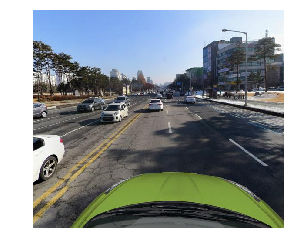

Retrieval top-5 result:


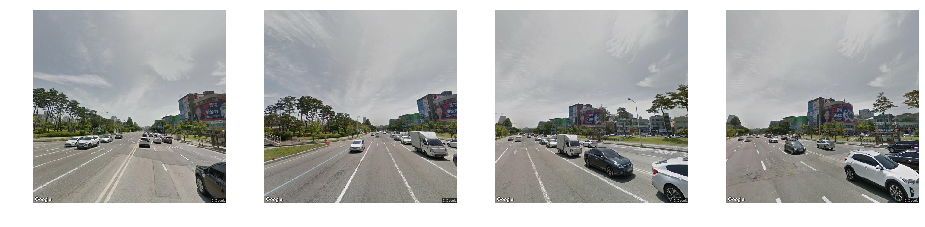

In [6]:
plt.subplot() 
query_name = "0"
query_index = 0
for query_index in range(len(queries)):
    if queries[query_index] == query_name:
        break
test_query = queries[query_index]
test_vector = query_vectors[query_index]
test_image = query_images[query_index]
rank_list = []
for vector, index in zip(database,indexes):
    rank_list.append((index, np.dot(vector, test_vector)))
rank_list.sort(key = lambda tup: tup[1], reverse=True)
print("Query %s" % test_query)
plt.axis('off')
plt.imshow(test_image)
plt.show()
print("Retrieval top-5 result:")
plt.figure(figsize=(20,10))
for i in range(4):
#     print(rank_list[i])
    im = img.imread(os.path.join(image_dir, rank_list[i][0] + '.jpg'))
    plt.subplot(2,5,i+1) 
    plt.axis('off')
    plt.imshow(im)
plt.show()

In [7]:
predicts = []
top_ranks = 10
for query,image,query_vector in zip(queries, query_images, query_vectors):
    rank_list = []
    predict = []
    predict.append(query)
    for vector, index in zip(database,indexes):
        rank_list.append((index, np.dot(vector, query_vector)))
    rank_list.sort(key = lambda tup: tup[1], reverse=True)
    for i in range(top_ranks):
        predict.append(rank_list[i][0])
    predicts.append(predict)

In [8]:
for predict in predicts:
    print(predict)

['0', '1291_gsv_2', '1377_gsv_2', '1377_gsv_3', '1378_gsv_3', '1378_gsv_2', '1291_gsv_3', '1292_gsv_1', '2241_gsv_4', '2328_gsv_5', '1552_gsv_3']
['1', '1291_gsv_2', '1377_gsv_2', '1465_gsv_3', '1378_gsv_3', '1379_gsv_3', '1552_gsv_3', '1380_gsv_3', '1377_gsv_3', '1378_gsv_2', '1464_gsv_3']
['2', '1293_gsv_2', '1296_gsv_2', '2069_gsv_1', '1002_gsv_3', '1381_gsv_4', '943_gsv_3', '1381_gsv_3', '1103_gsv_3', '1379_gsv_3', '1380_gsv_3']
['3', '1296_gsv_2', '2416_gsv_2', '1297_gsv_1', '2414_gsv_2', '2328_gsv_2', '2414_gsv_1', '2069_gsv_1', '2502_gsv_2', '1380_gsv_2', '2241_gsv_2']
['4', '1297_gsv_2', '2416_gsv_2', '1212_gsv_2', '2069_gsv_1', '2415_gsv_4', '3353_gsv_0', '2241_gsv_1', '2414_gsv_2', '2068_gsv_1', '1296_gsv_2']
['5', '1212_gsv_2', '2416_gsv_2', '1297_gsv_2', '2414_gsv_2', '2414_gsv_1', '2982_gsv_6', '1803_gsv_0', '3267_gsv_1', '1303_gsv_6', '2415_gsv_2']
['6', '3353_gsv_3', '2502_gsv_2', '2416_gsv_2', '2414_gsv_2', '2415_gsv_2', '1103_gsv_3', '1091_gsv_3', '3182_gsv_3', '1117_g

In [9]:
ref_file = "/home/canhld/workplace/Daejeon_street_view/datasets/daejeon_sv_v1.csv"
with open(ref_file) as f:
    contents = f.readlines()
lines = [x.strip('\n') for x in contents]
ref = dict()
for line in lines:
    tup = line.split('\t')
    ref[tup[0]] = tuple(tup[1:])
gps = []
for predict in predicts:
    gps_data = ref[predict[1][:-6]]
    gps.append(gps_data)
print(len(gps))
for point in gps:
    print(point)

161
('36.35866422', '127.3609579')
('36.35866422', '127.3609579')
('36.35859713', '127.3614952')
('36.3585149', '127.3619706')
('36.35852164', '127.3622177')
('36.3585111', '127.3623697')
('36.36264286', '127.3795727')
('36.357898', '127.3766')
('36.3584672', '127.3638351')
('36.3582312', '127.3643353')
('36.35821347', '127.3645449')
('36.3582024', '127.3646758')
('36.3581415', '127.3651839')
('36.3581415', '127.3651839')
('36.36038369', '127.3619848')
('36.35780551', '127.3734173')
('36.35796893', '127.3669718')
('36.35796893', '127.3669718')
('36.36018385', '127.3617802')
('36.36076279', '127.3623959')
('36.35780398', '127.3682875')
('36.3578228', '127.3684241')
('36.3578228', '127.3684241')
('36.35780551', '127.3734173')
('36.35780227', '127.3727599')
('36.3578123', '127.3697026')
('36.3578008', '127.3724713')
('36.35780551', '127.3734173')
('36.35769369', '127.3707874')
('36.35769369', '127.3707874')
('36.35780551', '127.3734173')
('36.35780315', '127.3722698')
('36.35780551', '127

In [124]:
import ThesisToolkit
from scipy import spatial
from skimage import feature
from skimage import measure
from skimage import transform
featureIO = ThesisToolkit.FeaturesIOToolkit

In [125]:
# test_images, test_locations, test_features = test.DelfReadDirectory(directory = query_dir)
database_features_dir = "/home/canhld/workplace/Daejeon_street_view/datasets/daejeon_sv_v1_delf/"
gv_predicts = []
for predict in predicts:
    query = predict[0]
    query_locs, query_des = featureIO.DelfReadSingleImage(features_path = os.path.join(query_dir, query + '.delf'))
    nums_features_q = len(query_des)
    # Create query tree for this query
    q_tree = spatial.cKDTree(query_des)
    rank_list = predict[1:]
    rerank_list = []
    for im in rank_list:
        im_locs, im_des = featureIO.DelfReadSingleImage(features_path = os.path.join(database_features_dir, im + '.delf'))
        nums_features_im = len(im_des)
        _, indices = q_tree.query(im_des, distance_upper_bound = 0.8)
        location_to_use_im = np.array([
            im_locs[i]
            for i in range(min(nums_features_im, nums_features_q))
            if indices[i] != nums_features_q
        ])
        location_to_use_q = np.array([
            query_locs[indices[i]]
            for i in range(min(nums_features_im, nums_features_q))
            if indices[i] != nums_features_q
        ])
        _, inliers = measure.ransac((location_to_use_q, location_to_use_im),
                          transform.AffineTransform,
                          min_samples=3,
                          residual_threshold=20,
                          max_trials=1000)
        print('%s: Found %d inliers from %d loc' % (im, sum(inliers), len(location_to_use_im)))
        rerank_list.append((im, sum(inliers)))
    rerank_list.sort(key = lambda tup: tup[1], reverse = True)
#     for im in rerank_list:
#         gv_list.append(im[0])
    print(rerank_list)
    gv_predicts.append((query,rerank_list[0][0]))
    print(gv_predicts)

/usr/local/lib/python3.5/dist-packages/skimage/transform/_geometric.py:683: RuntimeWarning: divide by zero encountered in true_divide
  H.flat[list(self._coeffs) + [8]] = - V[-1, :-1] / V[-1, -1]
/usr/local/lib/python3.5/dist-packages/skimage/transform/_geometric.py:687: RuntimeWarning: invalid value encountered in matmul
  H = np.linalg.inv(dst_matrix) @ H @ src_matrix
/usr/local/lib/python3.5/dist-packages/skimage/measure/fit.py:831: RuntimeWarning: invalid value encountered in less
  sample_model_inliers = sample_model_residuals < residual_threshold


1291_gsv_2: Found 74 inliers from 204 loc
1377_gsv_2: Found 61 inliers from 200 loc
1377_gsv_3: Found 47 inliers from 236 loc


/usr/local/lib/python3.5/dist-packages/skimage/transform/_geometric.py:683: RuntimeWarning: invalid value encountered in true_divide
  H.flat[list(self._coeffs) + [8]] = - V[-1, :-1] / V[-1, -1]


1378_gsv_3: Found 52 inliers from 181 loc
1378_gsv_2: Found 42 inliers from 196 loc
1291_gsv_3: Found 44 inliers from 206 loc
1292_gsv_1: Found 27 inliers from 217 loc
2241_gsv_4: Found 18 inliers from 183 loc
2328_gsv_5: Found 21 inliers from 154 loc
1552_gsv_3: Found 23 inliers from 171 loc
[('1291_gsv_2', 74), ('1377_gsv_2', 61), ('1378_gsv_3', 52), ('1377_gsv_3', 47), ('1291_gsv_3', 44), ('1378_gsv_2', 42), ('1292_gsv_1', 27), ('1552_gsv_3', 23), ('2328_gsv_5', 21), ('2241_gsv_4', 18)]
[('0', '1291_gsv_2')]
1291_gsv_2: Found 79 inliers from 196 loc
1377_gsv_2: Found 52 inliers from 182 loc
1465_gsv_3: Found 45 inliers from 166 loc
1378_gsv_3: Found 40 inliers from 171 loc
1379_gsv_3: Found 42 inliers from 168 loc
1552_gsv_3: Found 38 inliers from 158 loc
1380_gsv_3: Found 42 inliers from 199 loc
1377_gsv_3: Found 37 inliers from 192 loc
1378_gsv_2: Found 49 inliers from 183 loc
1464_gsv_3: Found 30 inliers from 154 loc
[('1291_gsv_2', 79), ('1377_gsv_2', 52), ('1378_gsv_2', 49), ('

999_gsv_2: Found 26 inliers from 192 loc
1059_gsv_2: Found 52 inliers from 237 loc
973_gsv_1: Found 28 inliers from 251 loc
1137_gsv_2: Found 65 inliers from 270 loc
1137_gsv_1: Found 41 inliers from 245 loc
905_gsv_1: Found 22 inliers from 238 loc
1003_gsv_2: Found 27 inliers from 246 loc
[('1136_gsv_2', 69), ('1137_gsv_2', 65), ('1059_gsv_2', 52), ('1137_gsv_1', 41), ('1060_gsv_2', 37), ('1059_gsv_1', 32), ('973_gsv_1', 28), ('1003_gsv_2', 27), ('999_gsv_2', 26), ('905_gsv_1', 22)]
[('0', '1291_gsv_2'), ('1', '1291_gsv_2'), ('2', '1293_gsv_2'), ('3', '1296_gsv_2'), ('4', '1297_gsv_2'), ('5', '1212_gsv_2'), ('6', '2502_gsv_2'), ('7', '1128_gsv_2'), ('8', '1305_gsv_2'), ('9', '1134_gsv_2'), ('10', '1134_gsv_2'), ('11', '1136_gsv_2')]
1138_gsv_2: Found 78 inliers from 287 loc
1137_gsv_2: Found 73 inliers from 290 loc
2069_gsv_1: Found 25 inliers from 188 loc
1137_gsv_1: Found 52 inliers from 250 loc
2416_gsv_2: Found 27 inliers from 174 loc
1138_gsv_1: Found 47 inliers from 264 loc
1135

980_gsv_2: Found 68 inliers from 199 loc
923_gsv_2: Found 41 inliers from 226 loc
981_gsv_2: Found 54 inliers from 153 loc
980_gsv_1: Found 64 inliers from 227 loc
981_gsv_1: Found 44 inliers from 206 loc
925_gsv_6: Found 43 inliers from 232 loc
1137_gsv_2: Found 30 inliers from 227 loc
1351_gsv_5: Found 38 inliers from 217 loc
3267_gsv_3: Found 13 inliers from 102 loc
2068_gsv_5: Found 18 inliers from 98 loc
[('980_gsv_2', 68), ('980_gsv_1', 64), ('981_gsv_2', 54), ('981_gsv_1', 44), ('925_gsv_6', 43), ('923_gsv_2', 41), ('1351_gsv_5', 38), ('1137_gsv_2', 30), ('2068_gsv_5', 18), ('3267_gsv_3', 13)]
[('0', '1291_gsv_2'), ('1', '1291_gsv_2'), ('2', '1293_gsv_2'), ('3', '1296_gsv_2'), ('4', '1297_gsv_2'), ('5', '1212_gsv_2'), ('6', '2502_gsv_2'), ('7', '1128_gsv_2'), ('8', '1305_gsv_2'), ('9', '1134_gsv_2'), ('10', '1134_gsv_2'), ('11', '1136_gsv_2'), ('12', '1138_gsv_2'), ('13', '1138_gsv_2'), ('14', '1060_gsv_2'), ('15', '1059_gsv_2'), ('16', '1060_gsv_2'), ('17', '1060_gsv_2'), ('18'

2068_gsv_1: Found 20 inliers from 167 loc
2068_gsv_2: Found 18 inliers from 185 loc
[('991_gsv_2', 52), ('1003_gsv_2', 32), ('934_gsv_6', 25), ('914_gsv_2', 25), ('999_gsv_2', 24), ('2068_gsv_1', 20), ('998_gsv_2', 19), ('2068_gsv_2', 18), ('2416_gsv_2', 17), ('914_gsv_1', 15)]
[('0', '1291_gsv_2'), ('1', '1291_gsv_2'), ('2', '1293_gsv_2'), ('3', '1296_gsv_2'), ('4', '1297_gsv_2'), ('5', '1212_gsv_2'), ('6', '2502_gsv_2'), ('7', '1128_gsv_2'), ('8', '1305_gsv_2'), ('9', '1134_gsv_2'), ('10', '1134_gsv_2'), ('11', '1136_gsv_2'), ('12', '1138_gsv_2'), ('13', '1138_gsv_2'), ('14', '1060_gsv_2'), ('15', '1059_gsv_2'), ('16', '1060_gsv_2'), ('17', '1060_gsv_2'), ('18', '1060_gsv_2'), ('19', '1003_gsv_2'), ('20', '980_gsv_2'), ('21', '980_gsv_2'), ('22', '1068_gsv_2'), ('23', '897_gsv_2'), ('24', '985_gsv_2'), ('25', '1159_gsv_2'), ('26', '1059_gsv_1'), ('27', '991_gsv_2')]
905_gsv_2: Found 72 inliers from 264 loc
905_gsv_1: Found 43 inliers from 289 loc
991_gsv_2: Found 77 inliers from 238 

1003_gsv_2: Found 49 inliers from 275 loc
999_gsv_2: Found 26 inliers from 199 loc
1003_gsv_1: Found 61 inliers from 242 loc
1002_gsv_2: Found 36 inliers from 208 loc
932_gsv_6: Found 29 inliers from 242 loc
914_gsv_2: Found 24 inliers from 219 loc
998_gsv_2: Found 28 inliers from 199 loc
1003_gsv_3: Found 29 inliers from 183 loc
1002_gsv_3: Found 27 inliers from 182 loc
1107_gsv_5: Found 23 inliers from 210 loc
[('1003_gsv_1', 61), ('1003_gsv_2', 49), ('1002_gsv_2', 36), ('932_gsv_6', 29), ('1003_gsv_3', 29), ('998_gsv_2', 28), ('1002_gsv_3', 27), ('999_gsv_2', 26), ('914_gsv_2', 24), ('1107_gsv_5', 23)]
[('0', '1291_gsv_2'), ('1', '1291_gsv_2'), ('2', '1293_gsv_2'), ('3', '1296_gsv_2'), ('4', '1297_gsv_2'), ('5', '1212_gsv_2'), ('6', '2502_gsv_2'), ('7', '1128_gsv_2'), ('8', '1305_gsv_2'), ('9', '1134_gsv_2'), ('10', '1134_gsv_2'), ('11', '1136_gsv_2'), ('12', '1138_gsv_2'), ('13', '1138_gsv_2'), ('14', '1060_gsv_2'), ('15', '1059_gsv_2'), ('16', '1060_gsv_2'), ('17', '1060_gsv_2'), 

924_gsv_2: Found 89 inliers from 244 loc
925_gsv_2: Found 68 inliers from 206 loc
927_gsv_2: Found 72 inliers from 245 loc
926_gsv_2: Found 84 inliers from 235 loc
928_gsv_1: Found 51 inliers from 237 loc
923_gsv_2: Found 62 inliers from 213 loc
926_gsv_1: Found 79 inliers from 240 loc
929_gsv_1: Found 37 inliers from 209 loc
928_gsv_2: Found 50 inliers from 207 loc
925_gsv_1: Found 67 inliers from 232 loc
[('924_gsv_2', 89), ('926_gsv_2', 84), ('926_gsv_1', 79), ('927_gsv_2', 72), ('925_gsv_2', 68), ('925_gsv_1', 67), ('923_gsv_2', 62), ('928_gsv_1', 51), ('928_gsv_2', 50), ('929_gsv_1', 37)]
[('0', '1291_gsv_2'), ('1', '1291_gsv_2'), ('2', '1293_gsv_2'), ('3', '1296_gsv_2'), ('4', '1297_gsv_2'), ('5', '1212_gsv_2'), ('6', '2502_gsv_2'), ('7', '1128_gsv_2'), ('8', '1305_gsv_2'), ('9', '1134_gsv_2'), ('10', '1134_gsv_2'), ('11', '1136_gsv_2'), ('12', '1138_gsv_2'), ('13', '1138_gsv_2'), ('14', '1060_gsv_2'), ('15', '1059_gsv_2'), ('16', '1060_gsv_2'), ('17', '1060_gsv_2'), ('18', '1060

936_gsv_2: Found 39 inliers from 184 loc
1021_gsv_1: Found 22 inliers from 171 loc
1021_gsv_2: Found 50 inliers from 187 loc
942_gsv_1: Found 29 inliers from 205 loc
935_gsv_1: Found 34 inliers from 207 loc
934_gsv_2: Found 67 inliers from 229 loc
937_gsv_2: Found 32 inliers from 189 loc
935_gsv_2: Found 78 inliers from 208 loc
943_gsv_1: Found 24 inliers from 173 loc
937_gsv_1: Found 45 inliers from 179 loc
[('935_gsv_2', 78), ('934_gsv_2', 67), ('1021_gsv_2', 50), ('937_gsv_1', 45), ('936_gsv_2', 39), ('935_gsv_1', 34), ('937_gsv_2', 32), ('942_gsv_1', 29), ('943_gsv_1', 24), ('1021_gsv_1', 22)]
[('0', '1291_gsv_2'), ('1', '1291_gsv_2'), ('2', '1293_gsv_2'), ('3', '1296_gsv_2'), ('4', '1297_gsv_2'), ('5', '1212_gsv_2'), ('6', '2502_gsv_2'), ('7', '1128_gsv_2'), ('8', '1305_gsv_2'), ('9', '1134_gsv_2'), ('10', '1134_gsv_2'), ('11', '1136_gsv_2'), ('12', '1138_gsv_2'), ('13', '1138_gsv_2'), ('14', '1060_gsv_2'), ('15', '1059_gsv_2'), ('16', '1060_gsv_2'), ('17', '1060_gsv_2'), ('18', '

943_gsv_2: Found 117 inliers from 229 loc
858_gsv_2: Found 71 inliers from 251 loc
943_gsv_1: Found 60 inliers from 204 loc
942_gsv_1: Found 45 inliers from 180 loc
1031_gsv_3: Found 26 inliers from 157 loc
945_gsv_2: Found 96 inliers from 207 loc
944_gsv_2: Found 75 inliers from 181 loc
943_gsv_3: Found 40 inliers from 186 loc
3182_gsv_3: Found 17 inliers from 134 loc
945_gsv_1: Found 43 inliers from 163 loc
[('943_gsv_2', 117), ('945_gsv_2', 96), ('944_gsv_2', 75), ('858_gsv_2', 71), ('943_gsv_1', 60), ('942_gsv_1', 45), ('945_gsv_1', 43), ('943_gsv_3', 40), ('1031_gsv_3', 26), ('3182_gsv_3', 17)]
[('0', '1291_gsv_2'), ('1', '1291_gsv_2'), ('2', '1293_gsv_2'), ('3', '1296_gsv_2'), ('4', '1297_gsv_2'), ('5', '1212_gsv_2'), ('6', '2502_gsv_2'), ('7', '1128_gsv_2'), ('8', '1305_gsv_2'), ('9', '1134_gsv_2'), ('10', '1134_gsv_2'), ('11', '1136_gsv_2'), ('12', '1138_gsv_2'), ('13', '1138_gsv_2'), ('14', '1060_gsv_2'), ('15', '1059_gsv_2'), ('16', '1060_gsv_2'), ('17', '1060_gsv_2'), ('18',

1632_gsv_0: Found 47 inliers from 178 loc
3353_gsv_1: Found 14 inliers from 121 loc
3182_gsv_1: Found 16 inliers from 145 loc
3267_gsv_1: Found 23 inliers from 114 loc
3353_gsv_0: Found 19 inliers from 70 loc
1632_gsv_7: Found 24 inliers from 145 loc
1719_gsv_0: Found 24 inliers from 177 loc
83_gsv_1: Found 12 inliers from 98 loc
943_gsv_2: Found 15 inliers from 85 loc
3093_gsv_1: Found 15 inliers from 112 loc
[('1632_gsv_0', 47), ('1632_gsv_7', 24), ('1719_gsv_0', 24), ('3267_gsv_1', 23), ('3353_gsv_0', 19), ('3182_gsv_1', 16), ('943_gsv_2', 15), ('3093_gsv_1', 15), ('3353_gsv_1', 14), ('83_gsv_1', 12)]
[('0', '1291_gsv_2'), ('1', '1291_gsv_2'), ('2', '1293_gsv_2'), ('3', '1296_gsv_2'), ('4', '1297_gsv_2'), ('5', '1212_gsv_2'), ('6', '2502_gsv_2'), ('7', '1128_gsv_2'), ('8', '1305_gsv_2'), ('9', '1134_gsv_2'), ('10', '1134_gsv_2'), ('11', '1136_gsv_2'), ('12', '1138_gsv_2'), ('13', '1138_gsv_2'), ('14', '1060_gsv_2'), ('15', '1059_gsv_2'), ('16', '1060_gsv_2'), ('17', '1060_gsv_2'), (

3267_gsv_1: Found 34 inliers from 147 loc
3353_gsv_1: Found 37 inliers from 156 loc
3182_gsv_1: Found 37 inliers from 172 loc
3267_gsv_0: Found 39 inliers from 113 loc
3353_gsv_0: Found 45 inliers from 104 loc
2241_gsv_1: Found 23 inliers from 133 loc
2069_gsv_1: Found 20 inliers from 130 loc
2062_gsv_7: Found 18 inliers from 154 loc
2414_gsv_2: Found 14 inliers from 110 loc
3439_gsv_4: Found 19 inliers from 86 loc
[('3353_gsv_0', 45), ('3267_gsv_0', 39), ('3353_gsv_1', 37), ('3182_gsv_1', 37), ('3267_gsv_1', 34), ('2241_gsv_1', 23), ('2069_gsv_1', 20), ('3439_gsv_4', 19), ('2062_gsv_7', 18), ('2414_gsv_2', 14)]
[('0', '1291_gsv_2'), ('1', '1291_gsv_2'), ('2', '1293_gsv_2'), ('3', '1296_gsv_2'), ('4', '1297_gsv_2'), ('5', '1212_gsv_2'), ('6', '2502_gsv_2'), ('7', '1128_gsv_2'), ('8', '1305_gsv_2'), ('9', '1134_gsv_2'), ('10', '1134_gsv_2'), ('11', '1136_gsv_2'), ('12', '1138_gsv_2'), ('13', '1138_gsv_2'), ('14', '1060_gsv_2'), ('15', '1059_gsv_2'), ('16', '1060_gsv_2'), ('17', '1060_gs

3095_gsv_0: Found 62 inliers from 183 loc
3267_gsv_0: Found 40 inliers from 145 loc
3182_gsv_7: Found 31 inliers from 148 loc
[('3095_gsv_0', 62), ('3094_gsv_0', 61), ('3353_gsv_1', 51), ('3267_gsv_1', 50), ('3353_gsv_0', 46), ('3182_gsv_1', 45), ('3267_gsv_0', 40), ('3182_gsv_0', 38), ('3182_gsv_7', 31), ('3353_gsv_3', 19)]
[('0', '1291_gsv_2'), ('1', '1291_gsv_2'), ('2', '1293_gsv_2'), ('3', '1296_gsv_2'), ('4', '1297_gsv_2'), ('5', '1212_gsv_2'), ('6', '2502_gsv_2'), ('7', '1128_gsv_2'), ('8', '1305_gsv_2'), ('9', '1134_gsv_2'), ('10', '1134_gsv_2'), ('11', '1136_gsv_2'), ('12', '1138_gsv_2'), ('13', '1138_gsv_2'), ('14', '1060_gsv_2'), ('15', '1059_gsv_2'), ('16', '1060_gsv_2'), ('17', '1060_gsv_2'), ('18', '1060_gsv_2'), ('19', '1003_gsv_2'), ('20', '980_gsv_2'), ('21', '980_gsv_2'), ('22', '1068_gsv_2'), ('23', '897_gsv_2'), ('24', '985_gsv_2'), ('25', '1159_gsv_2'), ('26', '1059_gsv_1'), ('27', '991_gsv_2'), ('28', '991_gsv_2'), ('29', '905_gsv_2'), ('30', '1003_gsv_2'), ('31', 

185_gsv_6: Found 26 inliers from 156 loc
3173_gsv_6: Found 19 inliers from 179 loc
263_gsv_2: Found 14 inliers from 173 loc
3178_gsv_7: Found 21 inliers from 161 loc
[('3177_gsv_6', 59), ('3178_gsv_6', 41), ('3177_gsv_7', 33), ('185_gsv_6', 26), ('3090_gsv_7', 22), ('3178_gsv_7', 21), ('3173_gsv_6', 19), ('182_gsv_3', 16), ('263_gsv_2', 14), ('192_gsv_5', 12)]
[('0', '1291_gsv_2'), ('1', '1291_gsv_2'), ('2', '1293_gsv_2'), ('3', '1296_gsv_2'), ('4', '1297_gsv_2'), ('5', '1212_gsv_2'), ('6', '2502_gsv_2'), ('7', '1128_gsv_2'), ('8', '1305_gsv_2'), ('9', '1134_gsv_2'), ('10', '1134_gsv_2'), ('11', '1136_gsv_2'), ('12', '1138_gsv_2'), ('13', '1138_gsv_2'), ('14', '1060_gsv_2'), ('15', '1059_gsv_2'), ('16', '1060_gsv_2'), ('17', '1060_gsv_2'), ('18', '1060_gsv_2'), ('19', '1003_gsv_2'), ('20', '980_gsv_2'), ('21', '980_gsv_2'), ('22', '1068_gsv_2'), ('23', '897_gsv_2'), ('24', '985_gsv_2'), ('25', '1159_gsv_2'), ('26', '1059_gsv_1'), ('27', '991_gsv_2'), ('28', '991_gsv_2'), ('29', '905_gs

3172_gsv_5: Found 48 inliers from 180 loc
3173_gsv_6: Found 74 inliers from 221 loc
3173_gsv_5: Found 57 inliers from 168 loc
3172_gsv_6: Found 47 inliers from 223 loc
3171_gsv_5: Found 28 inliers from 192 loc
181_gsv_6: Found 23 inliers from 153 loc
3171_gsv_1: Found 13 inliers from 138 loc
185_gsv_6: Found 20 inliers from 136 loc
3173_gsv_7: Found 43 inliers from 172 loc
100_gsv_1: Found 18 inliers from 126 loc
[('3173_gsv_6', 74), ('3173_gsv_5', 57), ('3172_gsv_5', 48), ('3172_gsv_6', 47), ('3173_gsv_7', 43), ('3171_gsv_5', 28), ('181_gsv_6', 23), ('185_gsv_6', 20), ('100_gsv_1', 18), ('3171_gsv_1', 13)]
[('0', '1291_gsv_2'), ('1', '1291_gsv_2'), ('2', '1293_gsv_2'), ('3', '1296_gsv_2'), ('4', '1297_gsv_2'), ('5', '1212_gsv_2'), ('6', '2502_gsv_2'), ('7', '1128_gsv_2'), ('8', '1305_gsv_2'), ('9', '1134_gsv_2'), ('10', '1134_gsv_2'), ('11', '1136_gsv_2'), ('12', '1138_gsv_2'), ('13', '1138_gsv_2'), ('14', '1060_gsv_2'), ('15', '1059_gsv_2'), ('16', '1060_gsv_2'), ('17', '1060_gsv_2')

3168_gsv_6: Found 77 inliers from 313 loc
3168_gsv_5: Found 83 inliers from 284 loc
3167_gsv_5: Found 59 inliers from 239 loc
3168_gsv_7: Found 45 inliers from 233 loc
3167_gsv_6: Found 35 inliers from 206 loc
3169_gsv_6: Found 67 inliers from 206 loc
1963_gsv_6: Found 44 inliers from 336 loc
3165_gsv_7: Found 34 inliers from 262 loc
3166_gsv_3: Found 22 inliers from 139 loc
1649_gsv_3: Found 22 inliers from 179 loc
[('3168_gsv_5', 83), ('3168_gsv_6', 77), ('3169_gsv_6', 67), ('3167_gsv_5', 59), ('3168_gsv_7', 45), ('1963_gsv_6', 44), ('3167_gsv_6', 35), ('3165_gsv_7', 34), ('3166_gsv_3', 22), ('1649_gsv_3', 22)]
[('0', '1291_gsv_2'), ('1', '1291_gsv_2'), ('2', '1293_gsv_2'), ('3', '1296_gsv_2'), ('4', '1297_gsv_2'), ('5', '1212_gsv_2'), ('6', '2502_gsv_2'), ('7', '1128_gsv_2'), ('8', '1305_gsv_2'), ('9', '1134_gsv_2'), ('10', '1134_gsv_2'), ('11', '1136_gsv_2'), ('12', '1138_gsv_2'), ('13', '1138_gsv_2'), ('14', '1060_gsv_2'), ('15', '1059_gsv_2'), ('16', '1060_gsv_2'), ('17', '1060_g

3162_gsv_6: Found 49 inliers from 254 loc
3162_gsv_5: Found 36 inliers from 187 loc
3159_gsv_3: Found 20 inliers from 209 loc
2003_gsv_6: Found 34 inliers from 241 loc
3162_gsv_3: Found 22 inliers from 141 loc
3156_gsv_2: Found 18 inliers from 206 loc
3137_gsv_2: Found 18 inliers from 210 loc
3141_gsv_6: Found 19 inliers from 183 loc
3162_gsv_2: Found 19 inliers from 198 loc
2004_gsv_6: Found 29 inliers from 209 loc
[('3162_gsv_6', 49), ('3162_gsv_5', 36), ('2003_gsv_6', 34), ('2004_gsv_6', 29), ('3162_gsv_3', 22), ('3159_gsv_3', 20), ('3141_gsv_6', 19), ('3162_gsv_2', 19), ('3156_gsv_2', 18), ('3137_gsv_2', 18)]
[('0', '1291_gsv_2'), ('1', '1291_gsv_2'), ('2', '1293_gsv_2'), ('3', '1296_gsv_2'), ('4', '1297_gsv_2'), ('5', '1212_gsv_2'), ('6', '2502_gsv_2'), ('7', '1128_gsv_2'), ('8', '1305_gsv_2'), ('9', '1134_gsv_2'), ('10', '1134_gsv_2'), ('11', '1136_gsv_2'), ('12', '1138_gsv_2'), ('13', '1138_gsv_2'), ('14', '1060_gsv_2'), ('15', '1059_gsv_2'), ('16', '1060_gsv_2'), ('17', '1060_g

2068_gsv_1: Found 21 inliers from 165 loc
2069_gsv_1: Found 21 inliers from 154 loc
2502_gsv_5: Found 21 inliers from 142 loc
2241_gsv_1: Found 20 inliers from 137 loc
2328_gsv_5: Found 19 inliers from 102 loc
1807_gsv_1: Found 19 inliers from 155 loc
2414_gsv_5: Found 17 inliers from 96 loc
2415_gsv_1: Found 14 inliers from 106 loc
68_gsv_2: Found 17 inliers from 121 loc
1002_gsv_6: Found 16 inliers from 138 loc
[('2068_gsv_1', 21), ('2069_gsv_1', 21), ('2502_gsv_5', 21), ('2241_gsv_1', 20), ('2328_gsv_5', 19), ('1807_gsv_1', 19), ('2414_gsv_5', 17), ('68_gsv_2', 17), ('1002_gsv_6', 16), ('2415_gsv_1', 14)]
[('0', '1291_gsv_2'), ('1', '1291_gsv_2'), ('2', '1293_gsv_2'), ('3', '1296_gsv_2'), ('4', '1297_gsv_2'), ('5', '1212_gsv_2'), ('6', '2502_gsv_2'), ('7', '1128_gsv_2'), ('8', '1305_gsv_2'), ('9', '1134_gsv_2'), ('10', '1134_gsv_2'), ('11', '1136_gsv_2'), ('12', '1138_gsv_2'), ('13', '1138_gsv_2'), ('14', '1060_gsv_2'), ('15', '1059_gsv_2'), ('16', '1060_gsv_2'), ('17', '1060_gsv_2'

3157_gsv_4: Found 108 inliers from 239 loc
2899_gsv_4: Found 34 inliers from 227 loc
3071_gsv_4: Found 53 inliers from 227 loc
2813_gsv_4: Found 34 inliers from 237 loc
2985_gsv_4: Found 32 inliers from 212 loc
2555_gsv_0: Found 31 inliers from 176 loc
492_gsv_4: Found 38 inliers from 208 loc
1136_gsv_0: Found 25 inliers from 280 loc
578_gsv_4: Found 36 inliers from 206 loc
3156_gsv_4: Found 29 inliers from 133 loc
[('3157_gsv_4', 108), ('3071_gsv_4', 53), ('492_gsv_4', 38), ('578_gsv_4', 36), ('2899_gsv_4', 34), ('2813_gsv_4', 34), ('2985_gsv_4', 32), ('2555_gsv_0', 31), ('3156_gsv_4', 29), ('1136_gsv_0', 25)]
[('0', '1291_gsv_2'), ('1', '1291_gsv_2'), ('2', '1293_gsv_2'), ('3', '1296_gsv_2'), ('4', '1297_gsv_2'), ('5', '1212_gsv_2'), ('6', '2502_gsv_2'), ('7', '1128_gsv_2'), ('8', '1305_gsv_2'), ('9', '1134_gsv_2'), ('10', '1134_gsv_2'), ('11', '1136_gsv_2'), ('12', '1138_gsv_2'), ('13', '1138_gsv_2'), ('14', '1060_gsv_2'), ('15', '1059_gsv_2'), ('16', '1060_gsv_2'), ('17', '1060_gsv

2727_gsv_4: Found 90 inliers from 363 loc
2813_gsv_4: Found 38 inliers from 257 loc
2899_gsv_4: Found 55 inliers from 262 loc
2985_gsv_4: Found 34 inliers from 171 loc
3244_gsv_4: Found 20 inliers from 246 loc
3203_gsv_3: Found 30 inliers from 279 loc
3375_gsv_3: Found 21 inliers from 275 loc
3071_gsv_4: Found 30 inliers from 178 loc
1994_gsv_4: Found 15 inliers from 276 loc
3290_gsv_3: Found 22 inliers from 264 loc
[('2727_gsv_4', 90), ('2899_gsv_4', 55), ('2813_gsv_4', 38), ('2985_gsv_4', 34), ('3203_gsv_3', 30), ('3071_gsv_4', 30), ('3290_gsv_3', 22), ('3375_gsv_3', 21), ('3244_gsv_4', 20), ('1994_gsv_4', 15)]
[('0', '1291_gsv_2'), ('1', '1291_gsv_2'), ('2', '1293_gsv_2'), ('3', '1296_gsv_2'), ('4', '1297_gsv_2'), ('5', '1212_gsv_2'), ('6', '2502_gsv_2'), ('7', '1128_gsv_2'), ('8', '1305_gsv_2'), ('9', '1134_gsv_2'), ('10', '1134_gsv_2'), ('11', '1136_gsv_2'), ('12', '1138_gsv_2'), ('13', '1138_gsv_2'), ('14', '1060_gsv_2'), ('15', '1059_gsv_2'), ('16', '1060_gsv_2'), ('17', '1060_g

2042_gsv_5: Found 19 inliers from 300 loc
1955_gsv_5: Found 16 inliers from 293 loc
1959_gsv_4: Found 15 inliers from 306 loc
1961_gsv_4: Found 15 inliers from 296 loc
3234_gsv_4: Found 14 inliers from 357 loc
3145_gsv_4: Found 21 inliers from 357 loc
[('2383_gsv_4', 59), ('2297_gsv_4', 55), ('3145_gsv_4', 21), ('2042_gsv_5', 19), ('1955_gsv_5', 16), ('1954_gsv_4', 15), ('1959_gsv_4', 15), ('1961_gsv_4', 15), ('3234_gsv_4', 14), ('1955_gsv_4', 13)]
[('0', '1291_gsv_2'), ('1', '1291_gsv_2'), ('2', '1293_gsv_2'), ('3', '1296_gsv_2'), ('4', '1297_gsv_2'), ('5', '1212_gsv_2'), ('6', '2502_gsv_2'), ('7', '1128_gsv_2'), ('8', '1305_gsv_2'), ('9', '1134_gsv_2'), ('10', '1134_gsv_2'), ('11', '1136_gsv_2'), ('12', '1138_gsv_2'), ('13', '1138_gsv_2'), ('14', '1060_gsv_2'), ('15', '1059_gsv_2'), ('16', '1060_gsv_2'), ('17', '1060_gsv_2'), ('18', '1060_gsv_2'), ('19', '1003_gsv_2'), ('20', '980_gsv_2'), ('21', '980_gsv_2'), ('22', '1068_gsv_2'), ('23', '897_gsv_2'), ('24', '985_gsv_2'), ('25', '11

1781_gsv_4: Found 45 inliers from 358 loc
1954_gsv_4: Found 30 inliers from 383 loc
1955_gsv_4: Found 18 inliers from 403 loc
1952_gsv_4: Found 60 inliers from 343 loc
3145_gsv_4: Found 25 inliers from 403 loc
1868_gsv_4: Found 46 inliers from 353 loc
1957_gsv_4: Found 23 inliers from 412 loc
[('2039_gsv_4', 91), ('2125_gsv_4', 84), ('1952_gsv_4', 60), ('1609_gsv_4', 48), ('1868_gsv_4', 46), ('1781_gsv_4', 45), ('1954_gsv_4', 30), ('3145_gsv_4', 25), ('1957_gsv_4', 23), ('1955_gsv_4', 18)]
[('0', '1291_gsv_2'), ('1', '1291_gsv_2'), ('2', '1293_gsv_2'), ('3', '1296_gsv_2'), ('4', '1297_gsv_2'), ('5', '1212_gsv_2'), ('6', '2502_gsv_2'), ('7', '1128_gsv_2'), ('8', '1305_gsv_2'), ('9', '1134_gsv_2'), ('10', '1134_gsv_2'), ('11', '1136_gsv_2'), ('12', '1138_gsv_2'), ('13', '1138_gsv_2'), ('14', '1060_gsv_2'), ('15', '1059_gsv_2'), ('16', '1060_gsv_2'), ('17', '1060_gsv_2'), ('18', '1060_gsv_2'), ('19', '1003_gsv_2'), ('20', '980_gsv_2'), ('21', '980_gsv_2'), ('22', '1068_gsv_2'), ('23', '89

1951_gsv_6: Found 79 inliers from 339 loc
1951_gsv_7: Found 51 inliers from 293 loc
1950_gsv_2: Found 44 inliers from 246 loc
3152_gsv_5: Found 23 inliers from 197 loc
1951_gsv_0: Found 23 inliers from 251 loc
1949_gsv_5: Found 42 inliers from 305 loc
1951_gsv_5: Found 46 inliers from 314 loc
1932_gsv_5: Found 40 inliers from 271 loc
1946_gsv_5: Found 44 inliers from 261 loc
1936_gsv_5: Found 41 inliers from 258 loc
[('1951_gsv_6', 79), ('1951_gsv_7', 51), ('1951_gsv_5', 46), ('1950_gsv_2', 44), ('1946_gsv_5', 44), ('1949_gsv_5', 42), ('1936_gsv_5', 41), ('1932_gsv_5', 40), ('3152_gsv_5', 23), ('1951_gsv_0', 23)]
[('0', '1291_gsv_2'), ('1', '1291_gsv_2'), ('2', '1293_gsv_2'), ('3', '1296_gsv_2'), ('4', '1297_gsv_2'), ('5', '1212_gsv_2'), ('6', '2502_gsv_2'), ('7', '1128_gsv_2'), ('8', '1305_gsv_2'), ('9', '1134_gsv_2'), ('10', '1134_gsv_2'), ('11', '1136_gsv_2'), ('12', '1138_gsv_2'), ('13', '1138_gsv_2'), ('14', '1060_gsv_2'), ('15', '1059_gsv_2'), ('16', '1060_gsv_2'), ('17', '1060_g

1946_gsv_5: Found 41 inliers from 264 loc
1945_gsv_5: Found 38 inliers from 282 loc
2968_gsv_6: Found 24 inliers from 203 loc
1945_gsv_6: Found 44 inliers from 248 loc
3142_gsv_6: Found 24 inliers from 198 loc
1949_gsv_6: Found 26 inliers from 236 loc
1947_gsv_5: Found 38 inliers from 224 loc
3055_gsv_5: Found 20 inliers from 210 loc
3143_gsv_5: Found 19 inliers from 203 loc
1944_gsv_6: Found 27 inliers from 211 loc
[('1945_gsv_6', 44), ('1946_gsv_5', 41), ('1945_gsv_5', 38), ('1947_gsv_5', 38), ('1944_gsv_6', 27), ('1949_gsv_6', 26), ('2968_gsv_6', 24), ('3142_gsv_6', 24), ('3055_gsv_5', 20), ('3143_gsv_5', 19)]
[('0', '1291_gsv_2'), ('1', '1291_gsv_2'), ('2', '1293_gsv_2'), ('3', '1296_gsv_2'), ('4', '1297_gsv_2'), ('5', '1212_gsv_2'), ('6', '2502_gsv_2'), ('7', '1128_gsv_2'), ('8', '1305_gsv_2'), ('9', '1134_gsv_2'), ('10', '1134_gsv_2'), ('11', '1136_gsv_2'), ('12', '1138_gsv_2'), ('13', '1138_gsv_2'), ('14', '1060_gsv_2'), ('15', '1059_gsv_2'), ('16', '1060_gsv_2'), ('17', '1060_g

1943_gsv_6: Found 69 inliers from 263 loc
1942_gsv_5: Found 71 inliers from 329 loc
1942_gsv_6: Found 72 inliers from 290 loc
1943_gsv_5: Found 63 inliers from 312 loc
1940_gsv_5: Found 60 inliers from 256 loc
1955_gsv_5: Found 62 inliers from 294 loc
1944_gsv_6: Found 44 inliers from 230 loc
1954_gsv_5: Found 60 inliers from 272 loc
1941_gsv_5: Found 59 inliers from 283 loc
1868_gsv_5: Found 34 inliers from 259 loc
[('1942_gsv_6', 72), ('1942_gsv_5', 71), ('1943_gsv_6', 69), ('1943_gsv_5', 63), ('1955_gsv_5', 62), ('1940_gsv_5', 60), ('1954_gsv_5', 60), ('1941_gsv_5', 59), ('1944_gsv_6', 44), ('1868_gsv_5', 34)]
[('0', '1291_gsv_2'), ('1', '1291_gsv_2'), ('2', '1293_gsv_2'), ('3', '1296_gsv_2'), ('4', '1297_gsv_2'), ('5', '1212_gsv_2'), ('6', '2502_gsv_2'), ('7', '1128_gsv_2'), ('8', '1305_gsv_2'), ('9', '1134_gsv_2'), ('10', '1134_gsv_2'), ('11', '1136_gsv_2'), ('12', '1138_gsv_2'), ('13', '1138_gsv_2'), ('14', '1060_gsv_2'), ('15', '1059_gsv_2'), ('16', '1060_gsv_2'), ('17', '1060_g

1939_gsv_6: Found 71 inliers from 243 loc
1935_gsv_6: Found 37 inliers from 242 loc
1945_gsv_5: Found 27 inliers from 282 loc
1948_gsv_6: Found 37 inliers from 261 loc
1936_gsv_6: Found 41 inliers from 273 loc
1950_gsv_6: Found 32 inliers from 227 loc
1937_gsv_6: Found 22 inliers from 210 loc
1946_gsv_5: Found 46 inliers from 261 loc
1932_gsv_5: Found 34 inliers from 234 loc
1949_gsv_6: Found 22 inliers from 256 loc
[('1939_gsv_6', 71), ('1946_gsv_5', 46), ('1936_gsv_6', 41), ('1935_gsv_6', 37), ('1948_gsv_6', 37), ('1932_gsv_5', 34), ('1950_gsv_6', 32), ('1945_gsv_5', 27), ('1937_gsv_6', 22), ('1949_gsv_6', 22)]
[('0', '1291_gsv_2'), ('1', '1291_gsv_2'), ('2', '1293_gsv_2'), ('3', '1296_gsv_2'), ('4', '1297_gsv_2'), ('5', '1212_gsv_2'), ('6', '2502_gsv_2'), ('7', '1128_gsv_2'), ('8', '1305_gsv_2'), ('9', '1134_gsv_2'), ('10', '1134_gsv_2'), ('11', '1136_gsv_2'), ('12', '1138_gsv_2'), ('13', '1138_gsv_2'), ('14', '1060_gsv_2'), ('15', '1059_gsv_2'), ('16', '1060_gsv_2'), ('17', '1060_g

1937_gsv_6: Found 26 inliers from 228 loc
1936_gsv_6: Found 61 inliers from 259 loc
1935_gsv_6: Found 69 inliers from 258 loc
1938_gsv_6: Found 25 inliers from 234 loc
3149_gsv_6: Found 42 inliers from 223 loc
1949_gsv_6: Found 32 inliers from 227 loc
3234_gsv_5: Found 36 inliers from 262 loc
2009_gsv_6: Found 34 inliers from 137 loc
1936_gsv_2: Found 33 inliers from 206 loc
1934_gsv_6: Found 46 inliers from 238 loc
[('1935_gsv_6', 69), ('1936_gsv_6', 61), ('1934_gsv_6', 46), ('3149_gsv_6', 42), ('3234_gsv_5', 36), ('2009_gsv_6', 34), ('1936_gsv_2', 33), ('1949_gsv_6', 32), ('1937_gsv_6', 26), ('1938_gsv_6', 25)]
[('0', '1291_gsv_2'), ('1', '1291_gsv_2'), ('2', '1293_gsv_2'), ('3', '1296_gsv_2'), ('4', '1297_gsv_2'), ('5', '1212_gsv_2'), ('6', '2502_gsv_2'), ('7', '1128_gsv_2'), ('8', '1305_gsv_2'), ('9', '1134_gsv_2'), ('10', '1134_gsv_2'), ('11', '1136_gsv_2'), ('12', '1138_gsv_2'), ('13', '1138_gsv_2'), ('14', '1060_gsv_2'), ('15', '1059_gsv_2'), ('16', '1060_gsv_2'), ('17', '1060_g

1933_gsv_6: Found 89 inliers from 422 loc
1933_gsv_7: Found 53 inliers from 212 loc
1932_gsv_0: Found 24 inliers from 240 loc
1932_gsv_5: Found 71 inliers from 391 loc
1932_gsv_6: Found 80 inliers from 343 loc
1931_gsv_5: Found 50 inliers from 382 loc
1933_gsv_5: Found 60 inliers from 322 loc
1950_gsv_5: Found 38 inliers from 339 loc
1932_gsv_7: Found 25 inliers from 194 loc
1949_gsv_5: Found 48 inliers from 346 loc
[('1933_gsv_6', 89), ('1932_gsv_6', 80), ('1932_gsv_5', 71), ('1933_gsv_5', 60), ('1933_gsv_7', 53), ('1931_gsv_5', 50), ('1949_gsv_5', 48), ('1950_gsv_5', 38), ('1932_gsv_7', 25), ('1932_gsv_0', 24)]
[('0', '1291_gsv_2'), ('1', '1291_gsv_2'), ('2', '1293_gsv_2'), ('3', '1296_gsv_2'), ('4', '1297_gsv_2'), ('5', '1212_gsv_2'), ('6', '2502_gsv_2'), ('7', '1128_gsv_2'), ('8', '1305_gsv_2'), ('9', '1134_gsv_2'), ('10', '1134_gsv_2'), ('11', '1136_gsv_2'), ('12', '1138_gsv_2'), ('13', '1138_gsv_2'), ('14', '1060_gsv_2'), ('15', '1059_gsv_2'), ('16', '1060_gsv_2'), ('17', '1060_g

1929_gsv_6: Found 107 inliers from 289 loc
1756_gsv_1: Found 15 inliers from 169 loc
1929_gsv_5: Found 59 inliers from 245 loc
1842_gsv_0: Found 14 inliers from 95 loc
1931_gsv_6: Found 39 inliers from 244 loc
1930_gsv_6: Found 45 inliers from 212 loc
1756_gsv_5: Found 25 inliers from 211 loc
1933_gsv_5: Found 28 inliers from 202 loc
1756_gsv_0: Found 19 inliers from 116 loc
1931_gsv_5: Found 36 inliers from 270 loc
[('1929_gsv_6', 107), ('1929_gsv_5', 59), ('1930_gsv_6', 45), ('1931_gsv_6', 39), ('1931_gsv_5', 36), ('1933_gsv_5', 28), ('1756_gsv_5', 25), ('1756_gsv_0', 19), ('1756_gsv_1', 15), ('1842_gsv_0', 14)]
[('0', '1291_gsv_2'), ('1', '1291_gsv_2'), ('2', '1293_gsv_2'), ('3', '1296_gsv_2'), ('4', '1297_gsv_2'), ('5', '1212_gsv_2'), ('6', '2502_gsv_2'), ('7', '1128_gsv_2'), ('8', '1305_gsv_2'), ('9', '1134_gsv_2'), ('10', '1134_gsv_2'), ('11', '1136_gsv_2'), ('12', '1138_gsv_2'), ('13', '1138_gsv_2'), ('14', '1060_gsv_2'), ('15', '1059_gsv_2'), ('16', '1060_gsv_2'), ('17', '1060_

2012_gsv_6: Found 107 inliers from 287 loc
1926_gsv_6: Found 34 inliers from 208 loc
2012_gsv_5: Found 69 inliers from 244 loc
2012_gsv_0: Found 22 inliers from 115 loc
2011_gsv_5: Found 36 inliers from 234 loc
1842_gsv_0: Found 12 inliers from 123 loc
2012_gsv_1: Found 16 inliers from 109 loc
2010_gsv_5: Found 29 inliers from 205 loc
1927_gsv_0: Found 13 inliers from 83 loc
1241_gsv_4: Found 20 inliers from 128 loc
[('2012_gsv_6', 107), ('2012_gsv_5', 69), ('2011_gsv_5', 36), ('1926_gsv_6', 34), ('2010_gsv_5', 29), ('2012_gsv_0', 22), ('1241_gsv_4', 20), ('2012_gsv_1', 16), ('1927_gsv_0', 13), ('1842_gsv_0', 12)]
[('0', '1291_gsv_2'), ('1', '1291_gsv_2'), ('2', '1293_gsv_2'), ('3', '1296_gsv_2'), ('4', '1297_gsv_2'), ('5', '1212_gsv_2'), ('6', '2502_gsv_2'), ('7', '1128_gsv_2'), ('8', '1305_gsv_2'), ('9', '1134_gsv_2'), ('10', '1134_gsv_2'), ('11', '1136_gsv_2'), ('12', '1138_gsv_2'), ('13', '1138_gsv_2'), ('14', '1060_gsv_2'), ('15', '1059_gsv_2'), ('16', '1060_gsv_2'), ('17', '1060_

1756_gsv_5: Found 17 inliers from 218 loc
2009_gsv_6: Found 36 inliers from 134 loc
2011_gsv_6: Found 22 inliers from 227 loc
2008_gsv_6: Found 49 inliers from 199 loc
3148_gsv_5: Found 22 inliers from 176 loc
1842_gsv_6: Found 14 inliers from 116 loc
1585_gsv_1: Found 17 inliers from 121 loc
1842_gsv_5: Found 21 inliers from 177 loc
3149_gsv_6: Found 23 inliers from 210 loc
1756_gsv_6: Found 18 inliers from 173 loc
[('2008_gsv_6', 49), ('2009_gsv_6', 36), ('3149_gsv_6', 23), ('2011_gsv_6', 22), ('3148_gsv_5', 22), ('1842_gsv_5', 21), ('1756_gsv_6', 18), ('1756_gsv_5', 17), ('1585_gsv_1', 17), ('1842_gsv_6', 14)]
[('0', '1291_gsv_2'), ('1', '1291_gsv_2'), ('2', '1293_gsv_2'), ('3', '1296_gsv_2'), ('4', '1297_gsv_2'), ('5', '1212_gsv_2'), ('6', '2502_gsv_2'), ('7', '1128_gsv_2'), ('8', '1305_gsv_2'), ('9', '1134_gsv_2'), ('10', '1134_gsv_2'), ('11', '1136_gsv_2'), ('12', '1138_gsv_2'), ('13', '1138_gsv_2'), ('14', '1060_gsv_2'), ('15', '1059_gsv_2'), ('16', '1060_gsv_2'), ('17', '1060_g

2003_gsv_6: Found 54 inliers from 237 loc
3234_gsv_6: Found 26 inliers from 206 loc
2005_gsv_6: Found 44 inliers from 270 loc
3149_gsv_6: Found 26 inliers from 205 loc
2011_gsv_5: Found 25 inliers from 229 loc
2010_gsv_6: Found 30 inliers from 205 loc
1999_gsv_6: Found 41 inliers from 245 loc
1945_gsv_5: Found 28 inliers from 223 loc
1671_gsv_6: Found 12 inliers from 93 loc
1933_gsv_5: Found 25 inliers from 198 loc
[('2003_gsv_6', 54), ('2005_gsv_6', 44), ('1999_gsv_6', 41), ('2010_gsv_6', 30), ('1945_gsv_5', 28), ('3234_gsv_6', 26), ('3149_gsv_6', 26), ('2011_gsv_5', 25), ('1933_gsv_5', 25), ('1671_gsv_6', 12)]
[('0', '1291_gsv_2'), ('1', '1291_gsv_2'), ('2', '1293_gsv_2'), ('3', '1296_gsv_2'), ('4', '1297_gsv_2'), ('5', '1212_gsv_2'), ('6', '2502_gsv_2'), ('7', '1128_gsv_2'), ('8', '1305_gsv_2'), ('9', '1134_gsv_2'), ('10', '1134_gsv_2'), ('11', '1136_gsv_2'), ('12', '1138_gsv_2'), ('13', '1138_gsv_2'), ('14', '1060_gsv_2'), ('15', '1059_gsv_2'), ('16', '1060_gsv_2'), ('17', '1060_gs

1828_gsv_6: Found 45 inliers from 220 loc
2000_gsv_6: Found 38 inliers from 215 loc
1999_gsv_6: Found 45 inliers from 279 loc
2003_gsv_6: Found 29 inliers from 262 loc
2000_gsv_5: Found 46 inliers from 281 loc
3161_gsv_6: Found 19 inliers from 245 loc
2001_gsv_6: Found 44 inliers from 256 loc
2003_gsv_5: Found 24 inliers from 267 loc
1999_gsv_5: Found 29 inliers from 246 loc
1756_gsv_5: Found 20 inliers from 198 loc
[('2000_gsv_5', 46), ('1828_gsv_6', 45), ('1999_gsv_6', 45), ('2001_gsv_6', 44), ('2000_gsv_6', 38), ('2003_gsv_6', 29), ('1999_gsv_5', 29), ('2003_gsv_5', 24), ('1756_gsv_5', 20), ('3161_gsv_6', 19)]
[('0', '1291_gsv_2'), ('1', '1291_gsv_2'), ('2', '1293_gsv_2'), ('3', '1296_gsv_2'), ('4', '1297_gsv_2'), ('5', '1212_gsv_2'), ('6', '2502_gsv_2'), ('7', '1128_gsv_2'), ('8', '1305_gsv_2'), ('9', '1134_gsv_2'), ('10', '1134_gsv_2'), ('11', '1136_gsv_2'), ('12', '1138_gsv_2'), ('13', '1138_gsv_2'), ('14', '1060_gsv_2'), ('15', '1059_gsv_2'), ('16', '1060_gsv_2'), ('17', '1060_g

1996_gsv_6: Found 69 inliers from 279 loc
1910_gsv_6: Found 53 inliers from 265 loc
1241_gsv_5: Found 19 inliers from 145 loc
1996_gsv_7: Found 44 inliers from 179 loc
1995_gsv_6: Found 38 inliers from 241 loc
2418_gsv_7: Found 32 inliers from 177 loc
2068_gsv_0: Found 16 inliers from 126 loc
1996_gsv_5: Found 29 inliers from 234 loc
1047_gsv_0: Found 32 inliers from 147 loc
1910_gsv_7: Found 38 inliers from 161 loc
[('1996_gsv_6', 69), ('1910_gsv_6', 53), ('1996_gsv_7', 44), ('1995_gsv_6', 38), ('1910_gsv_7', 38), ('2418_gsv_7', 32), ('1047_gsv_0', 32), ('1996_gsv_5', 29), ('1241_gsv_5', 19), ('2068_gsv_0', 16)]
[('0', '1291_gsv_2'), ('1', '1291_gsv_2'), ('2', '1293_gsv_2'), ('3', '1296_gsv_2'), ('4', '1297_gsv_2'), ('5', '1212_gsv_2'), ('6', '2502_gsv_2'), ('7', '1128_gsv_2'), ('8', '1305_gsv_2'), ('9', '1134_gsv_2'), ('10', '1134_gsv_2'), ('11', '1136_gsv_2'), ('12', '1138_gsv_2'), ('13', '1138_gsv_2'), ('14', '1060_gsv_2'), ('15', '1059_gsv_2'), ('16', '1060_gsv_2'), ('17', '1060_g

1993_gsv_6: Found 23 inliers from 204 loc
2241_gsv_1: Found 20 inliers from 138 loc
1908_gsv_6: Found 42 inliers from 210 loc
2068_gsv_6: Found 15 inliers from 102 loc
2241_gsv_0: Found 18 inliers from 105 loc
4176_gsv_0: Found 16 inliers from 164 loc
2079_gsv_6: Found 21 inliers from 194 loc
2068_gsv_7: Found 13 inliers from 108 loc
2416_gsv_7: Found 9 inliers from 88 loc
2414_gsv_0: Found 15 inliers from 91 loc
[('1908_gsv_6', 42), ('1993_gsv_6', 23), ('2079_gsv_6', 21), ('2241_gsv_1', 20), ('2241_gsv_0', 18), ('4176_gsv_0', 16), ('2068_gsv_6', 15), ('2414_gsv_0', 15), ('2068_gsv_7', 13), ('2416_gsv_7', 9)]
[('0', '1291_gsv_2'), ('1', '1291_gsv_2'), ('2', '1293_gsv_2'), ('3', '1296_gsv_2'), ('4', '1297_gsv_2'), ('5', '1212_gsv_2'), ('6', '2502_gsv_2'), ('7', '1128_gsv_2'), ('8', '1305_gsv_2'), ('9', '1134_gsv_2'), ('10', '1134_gsv_2'), ('11', '1136_gsv_2'), ('12', '1138_gsv_2'), ('13', '1138_gsv_2'), ('14', '1060_gsv_2'), ('15', '1059_gsv_2'), ('16', '1060_gsv_2'), ('17', '1060_gsv_2

1991_gsv_7: Found 37 inliers from 158 loc
2161_gsv_7: Found 37 inliers from 178 loc
2249_gsv_7: Found 42 inliers from 175 loc
2163_gsv_7: Found 34 inliers from 143 loc
2078_gsv_7: Found 33 inliers from 202 loc
2241_gsv_1: Found 30 inliers from 142 loc
1091_gsv_6: Found 20 inliers from 152 loc
3424_gsv_0: Found 17 inliers from 142 loc
2813_gsv_0: Found 27 inliers from 141 loc
3243_gsv_0: Found 22 inliers from 184 loc
[('2249_gsv_7', 42), ('1991_gsv_7', 37), ('2161_gsv_7', 37), ('2163_gsv_7', 34), ('2078_gsv_7', 33), ('2241_gsv_1', 30), ('2813_gsv_0', 27), ('3243_gsv_0', 22), ('1091_gsv_6', 20), ('3424_gsv_0', 17)]
[('0', '1291_gsv_2'), ('1', '1291_gsv_2'), ('2', '1293_gsv_2'), ('3', '1296_gsv_2'), ('4', '1297_gsv_2'), ('5', '1212_gsv_2'), ('6', '2502_gsv_2'), ('7', '1128_gsv_2'), ('8', '1305_gsv_2'), ('9', '1134_gsv_2'), ('10', '1134_gsv_2'), ('11', '1136_gsv_2'), ('12', '1138_gsv_2'), ('13', '1138_gsv_2'), ('14', '1060_gsv_2'), ('15', '1059_gsv_2'), ('16', '1060_gsv_2'), ('17', '1060_g

2502_gsv_5: Found 20 inliers from 153 loc
2414_gsv_0: Found 16 inliers from 100 loc
2414_gsv_6: Found 17 inliers from 85 loc
2502_gsv_6: Found 19 inliers from 120 loc
2241_gsv_0: Found 16 inliers from 123 loc
2069_gsv_6: Found 15 inliers from 118 loc
2068_gsv_6: Found 14 inliers from 130 loc
2068_gsv_0: Found 21 inliers from 139 loc
2416_gsv_5: Found 20 inliers from 152 loc
2069_gsv_5: Found 17 inliers from 145 loc
[('2068_gsv_0', 21), ('2502_gsv_5', 20), ('2416_gsv_5', 20), ('2502_gsv_6', 19), ('2414_gsv_6', 17), ('2069_gsv_5', 17), ('2414_gsv_0', 16), ('2241_gsv_0', 16), ('2069_gsv_6', 15), ('2068_gsv_6', 14)]
[('0', '1291_gsv_2'), ('1', '1291_gsv_2'), ('2', '1293_gsv_2'), ('3', '1296_gsv_2'), ('4', '1297_gsv_2'), ('5', '1212_gsv_2'), ('6', '2502_gsv_2'), ('7', '1128_gsv_2'), ('8', '1305_gsv_2'), ('9', '1134_gsv_2'), ('10', '1134_gsv_2'), ('11', '1136_gsv_2'), ('12', '1138_gsv_2'), ('13', '1138_gsv_2'), ('14', '1060_gsv_2'), ('15', '1059_gsv_2'), ('16', '1060_gsv_2'), ('17', '1060_gs

2502_gsv_5: Found 40 inliers from 198 loc
2414_gsv_6: Found 23 inliers from 172 loc
2415_gsv_6: Found 19 inliers from 164 loc
2502_gsv_6: Found 29 inliers from 193 loc
2414_gsv_5: Found 24 inliers from 195 loc
2414_gsv_0: Found 23 inliers from 174 loc
2415_gsv_7: Found 15 inliers from 149 loc
2416_gsv_6: Found 23 inliers from 167 loc
2241_gsv_6: Found 26 inliers from 170 loc
2416_gsv_5: Found 33 inliers from 195 loc
[('2502_gsv_5', 40), ('2416_gsv_5', 33), ('2502_gsv_6', 29), ('2241_gsv_6', 26), ('2414_gsv_5', 24), ('2414_gsv_6', 23), ('2414_gsv_0', 23), ('2416_gsv_6', 23), ('2415_gsv_6', 19), ('2415_gsv_7', 15)]
[('0', '1291_gsv_2'), ('1', '1291_gsv_2'), ('2', '1293_gsv_2'), ('3', '1296_gsv_2'), ('4', '1297_gsv_2'), ('5', '1212_gsv_2'), ('6', '2502_gsv_2'), ('7', '1128_gsv_2'), ('8', '1305_gsv_2'), ('9', '1134_gsv_2'), ('10', '1134_gsv_2'), ('11', '1136_gsv_2'), ('12', '1138_gsv_2'), ('13', '1138_gsv_2'), ('14', '1060_gsv_2'), ('15', '1059_gsv_2'), ('16', '1060_gsv_2'), ('17', '1060_g

2502_gsv_5: Found 39 inliers from 201 loc
2414_gsv_5: Found 33 inliers from 178 loc
2416_gsv_5: Found 39 inliers from 195 loc
2414_gsv_4: Found 24 inliers from 206 loc
2415_gsv_4: Found 24 inliers from 164 loc
2415_gsv_5: Found 31 inliers from 186 loc
2328_gsv_5: Found 36 inliers from 176 loc
2502_gsv_4: Found 28 inliers from 188 loc
2416_gsv_4: Found 31 inliers from 179 loc
2241_gsv_5: Found 27 inliers from 180 loc
[('2502_gsv_5', 39), ('2416_gsv_5', 39), ('2328_gsv_5', 36), ('2414_gsv_5', 33), ('2415_gsv_5', 31), ('2416_gsv_4', 31), ('2502_gsv_4', 28), ('2241_gsv_5', 27), ('2414_gsv_4', 24), ('2415_gsv_4', 24)]
[('0', '1291_gsv_2'), ('1', '1291_gsv_2'), ('2', '1293_gsv_2'), ('3', '1296_gsv_2'), ('4', '1297_gsv_2'), ('5', '1212_gsv_2'), ('6', '2502_gsv_2'), ('7', '1128_gsv_2'), ('8', '1305_gsv_2'), ('9', '1134_gsv_2'), ('10', '1134_gsv_2'), ('11', '1136_gsv_2'), ('12', '1138_gsv_2'), ('13', '1138_gsv_2'), ('14', '1060_gsv_2'), ('15', '1059_gsv_2'), ('16', '1060_gsv_2'), ('17', '1060_g

2241_gsv_4: Found 22 inliers from 217 loc
2502_gsv_5: Found 29 inliers from 203 loc
2328_gsv_4: Found 20 inliers from 191 loc
2415_gsv_5: Found 28 inliers from 185 loc
[('2068_gsv_5', 40), ('2414_gsv_5', 39), ('2328_gsv_5', 39), ('2241_gsv_5', 35), ('2069_gsv_5', 33), ('2502_gsv_5', 29), ('2415_gsv_5', 28), ('2414_gsv_4', 24), ('2241_gsv_4', 22), ('2328_gsv_4', 20)]
[('0', '1291_gsv_2'), ('1', '1291_gsv_2'), ('2', '1293_gsv_2'), ('3', '1296_gsv_2'), ('4', '1297_gsv_2'), ('5', '1212_gsv_2'), ('6', '2502_gsv_2'), ('7', '1128_gsv_2'), ('8', '1305_gsv_2'), ('9', '1134_gsv_2'), ('10', '1134_gsv_2'), ('11', '1136_gsv_2'), ('12', '1138_gsv_2'), ('13', '1138_gsv_2'), ('14', '1060_gsv_2'), ('15', '1059_gsv_2'), ('16', '1060_gsv_2'), ('17', '1060_gsv_2'), ('18', '1060_gsv_2'), ('19', '1003_gsv_2'), ('20', '980_gsv_2'), ('21', '980_gsv_2'), ('22', '1068_gsv_2'), ('23', '897_gsv_2'), ('24', '985_gsv_2'), ('25', '1159_gsv_2'), ('26', '1059_gsv_1'), ('27', '991_gsv_2'), ('28', '991_gsv_2'), ('29', '

2068_gsv_5: Found 35 inliers from 193 loc
2069_gsv_5: Found 33 inliers from 198 loc
2414_gsv_5: Found 25 inliers from 183 loc
2241_gsv_5: Found 34 inliers from 202 loc
2328_gsv_5: Found 22 inliers from 186 loc
1897_gsv_5: Found 23 inliers from 164 loc
2241_gsv_4: Found 17 inliers from 169 loc
2328_gsv_4: Found 20 inliers from 178 loc
2414_gsv_4: Found 23 inliers from 185 loc
2068_gsv_6: Found 20 inliers from 161 loc
[('2068_gsv_5', 35), ('2241_gsv_5', 34), ('2069_gsv_5', 33), ('2414_gsv_5', 25), ('1897_gsv_5', 23), ('2414_gsv_4', 23), ('2328_gsv_5', 22), ('2328_gsv_4', 20), ('2068_gsv_6', 20), ('2241_gsv_4', 17)]
[('0', '1291_gsv_2'), ('1', '1291_gsv_2'), ('2', '1293_gsv_2'), ('3', '1296_gsv_2'), ('4', '1297_gsv_2'), ('5', '1212_gsv_2'), ('6', '2502_gsv_2'), ('7', '1128_gsv_2'), ('8', '1305_gsv_2'), ('9', '1134_gsv_2'), ('10', '1134_gsv_2'), ('11', '1136_gsv_2'), ('12', '1138_gsv_2'), ('13', '1138_gsv_2'), ('14', '1060_gsv_2'), ('15', '1059_gsv_2'), ('16', '1060_gsv_2'), ('17', '1060_g

2241_gsv_4: Found 19 inliers from 172 loc
1894_gsv_5: Found 43 inliers from 186 loc
2068_gsv_5: Found 25 inliers from 209 loc
2241_gsv_5: Found 22 inliers from 181 loc
1979_gsv_5: Found 45 inliers from 187 loc
2069_gsv_5: Found 24 inliers from 195 loc
1895_gsv_5: Found 26 inliers from 160 loc
2328_gsv_5: Found 23 inliers from 158 loc
1893_gsv_5: Found 30 inliers from 173 loc
[('1896_gsv_5', 53), ('1979_gsv_5', 45), ('1894_gsv_5', 43), ('1893_gsv_5', 30), ('1895_gsv_5', 26), ('2068_gsv_5', 25), ('2069_gsv_5', 24), ('2328_gsv_5', 23), ('2241_gsv_5', 22), ('2241_gsv_4', 19)]
[('0', '1291_gsv_2'), ('1', '1291_gsv_2'), ('2', '1293_gsv_2'), ('3', '1296_gsv_2'), ('4', '1297_gsv_2'), ('5', '1212_gsv_2'), ('6', '2502_gsv_2'), ('7', '1128_gsv_2'), ('8', '1305_gsv_2'), ('9', '1134_gsv_2'), ('10', '1134_gsv_2'), ('11', '1136_gsv_2'), ('12', '1138_gsv_2'), ('13', '1138_gsv_2'), ('14', '1060_gsv_2'), ('15', '1059_gsv_2'), ('16', '1060_gsv_2'), ('17', '1060_gsv_2'), ('18', '1060_gsv_2'), ('19', '1003

1550_gsv_5: Found 38 inliers from 197 loc
1636_gsv_4: Found 19 inliers from 194 loc
1550_gsv_7: Found 13 inliers from 146 loc
1464_gsv_6: Found 21 inliers from 158 loc
1550_gsv_6: Found 23 inliers from 163 loc
1550_gsv_4: Found 33 inliers from 154 loc
1464_gsv_7: Found 19 inliers from 157 loc
1464_gsv_5: Found 42 inliers from 195 loc
1464_gsv_0: Found 15 inliers from 145 loc
1636_gsv_3: Found 21 inliers from 168 loc
[('1464_gsv_5', 42), ('1550_gsv_5', 38), ('1550_gsv_4', 33), ('1550_gsv_6', 23), ('1464_gsv_6', 21), ('1636_gsv_3', 21), ('1636_gsv_4', 19), ('1464_gsv_7', 19), ('1464_gsv_0', 15), ('1550_gsv_7', 13)]
[('0', '1291_gsv_2'), ('1', '1291_gsv_2'), ('2', '1293_gsv_2'), ('3', '1296_gsv_2'), ('4', '1297_gsv_2'), ('5', '1212_gsv_2'), ('6', '2502_gsv_2'), ('7', '1128_gsv_2'), ('8', '1305_gsv_2'), ('9', '1134_gsv_2'), ('10', '1134_gsv_2'), ('11', '1136_gsv_2'), ('12', '1138_gsv_2'), ('13', '1138_gsv_2'), ('14', '1060_gsv_2'), ('15', '1059_gsv_2'), ('16', '1060_gsv_2'), ('17', '1060_g

In [126]:
ref_file = "/home/canhld/workplace/Daejeon_street_view/datasets/daejeon_sv_v1.csv"
with open(ref_file) as f:
    contents = f.readlines()
lines = [x.strip('\n') for x in contents]
ref = dict()
for line in lines:
    tup = line.split('\t')
    ref[tup[0]] = tuple(tup[1:])
gps = []
for predict in gv_predicts:
    gps_data = ref[predict[1][:-6]]
    gps.append(gps_data)
print(len(gps))
for point in gps:
    print(point)

161
('36.35866422', '127.3609579')
('36.35866422', '127.3609579')
('36.35859713', '127.3614952')
('36.3585149', '127.3619706')
('36.35852164', '127.3622177')
('36.3585111', '127.3623697')
('36.3609517', '127.3626296')
('36.3584899', '127.3630018')
('36.35842796', '127.3640006')
('36.3582312', '127.3643353')
('36.3582312', '127.3643353')
('36.3582024', '127.3646758')
('36.3581415', '127.3651839')
('36.3581415', '127.3651839')
('36.35796893', '127.3669718')
('36.3579839', '127.3668166')
('36.35796893', '127.3669718')
('36.35796893', '127.3669718')
('36.35796893', '127.3669718')
('36.35780551', '127.3734173')
('36.35780398', '127.3682875')
('36.35780398', '127.3682875')
('36.3578817', '127.3685993')
('36.3578289', '127.3689517')
('36.35781714', '127.3693774')
('36.3578123', '127.3697026')
('36.3579839', '127.3668166')
('36.357773', '127.3706769')
('36.357773', '127.3706769')
('36.35769369', '127.3707874')
('36.35780551', '127.3734173')
('36.35780315', '127.3722698')
('36.35780315', '127.3

In [116]:
# Default resolutions of the frame are obtained.The default resolutions are system dependent.
# We convert the resolutions from float to integer.
frame_width = int(577*2)
frame_height = int(500)
 
# Define the codec and create VideoWriter object.The output is stored in 'outpy.avi' file.
out = cv.VideoWriter('outpy.avi', cv.VideoWriter_fourcc('M','J','P','G'), 3, (frame_width,frame_height))
for im, pred in zip(query_images, gv_predicts):
    im = cv.cvtColor(im, cv.COLOR_BGR2RGB)
    pred_im_name = pred[1]
    pred_im = cv.imread(os.path.join(image_dir, pred_im_name + '.jpg'), flags=cv.IMREAD_UNCHANGED)
    pred_im = cv.resize(pred_im, (577,577))
    concat_im = cv.hconcat([im, pred_im[77:577,:,:]])
#     concat_im = concat_im[77:577,:,:]
    out.write(concat_im)
out.release()

In [104]:
from IPython.display import HTML
HTML("""
    <video alt="test" controls>
        <source src="/home/canhld/workplace/Daejeon_street_view/dev/outpy.mp4" type="video/mp4">
    </video>
""")